In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

from zigzag import *
from oanda_api import OandaAPI

In [8]:
oanda=OandaAPI(url='https://api-fxtrade.oanda.com/v1/candles?',
               instrument='EUR_AUD',
               granularity='D',
               alignmentTimezone='Europe/London')

oanda.run(start='2016-05-30T22:00:00',
          end='2016-08-16T22:00:00')

With the call above we are getting candle information covering 4 years of data
And if we get the closeAsk prices and the datetime for each of the fetched candles:

In [10]:
close_prices=[]
datetimes=[]
for c in oanda.fetch_candleset():
    close_prices.append(c.closeAsk)
    datetimes.append(c.time)

In [17]:
pivots = peak_valley_pivots(np.array(close_prices), 0.05, -0.05)

In [18]:
def plot_pivots(X, pivots):
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

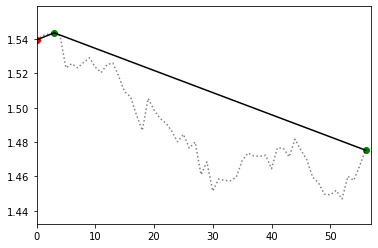

In [19]:
plot_pivots(np.array(close_prices), pivots)